In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
from batty import BAT_sampler, BAT, Distributions

/home/iwsatlas1/peller/batty/batty.py:6: UserWarning: Not able to use compiled modules, resulting in (very) slow import
 See https://pyjulia.readthedocs.io/en/latest/troubleshooting.html
  warnings.warn("Not able to use compiled modules, resulting in (very) slow import\n See https://pyjulia.readthedocs.io/en/latest/troubleshooting.html")


# Minimal Example

In [3]:
sampler = BAT_sampler(llh=lambda x : -0.5 * x**2, prior_specs=Distributions.Uniform(-3, 3))

In [4]:
result = sampler.run()

[ Info: Initializing new RNG of type Random123.Philox4x{UInt64, 10}
[ Info: Using transform algorithm BAT.PriorSubstitution()
[ Info: Trying to generate 4 viable MCMC chain(s).
[ Info: Selected 4 MCMC chain(s).
[ Info: Begin tuning of 4 MCMC chain(s).
[ Info: MCMC Tuning cycle 1 finished, 4 chains, 4 tuned, 4 converged.
[ Info: MCMC tuning of 4 chains successful after 1 cycle(s).
[ Info: Running post-tuning stabilization steps for 4 MCMC chain(s).
┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall ~/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


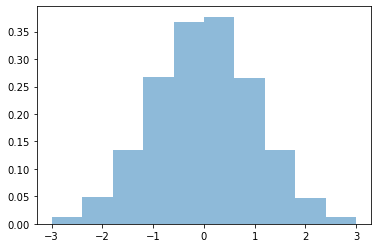

In [5]:
plt.hist(result.samples, weights=result.weight, density=True, alpha=0.5);

# More Complicated Example

In [6]:
s = np.random.rand(2,2)
prior_specs = {'a' : Distributions.Uniform(-3,3), 'b' : Distributions.MvNormal([1,1], s@s.T), }

In [7]:
def llh(x, d):
    return -0.5 * ((x.b[0] - d[0])**2 + (x.b[1] - d[1])**2/4) - x.a

In [8]:
d = [-1, 1]

In [9]:
sampler = BAT_sampler(llh, prior_specs, llh_args=(d,), mcalg=BAT.MetropolisHastings(weighting=BAT.ARPWeighting()))

In [10]:
%%time
sampler.run(nsteps=1e5, nchains=10);

[ Info: Initializing new RNG of type Random123.Philox4x{UInt64, 10}
[ Info: Using transform algorithm BAT.PriorSubstitution()
[ Info: Trying to generate 10 viable MCMC chain(s).
[ Info: Selected 10 MCMC chain(s).
[ Info: Begin tuning of 10 MCMC chain(s).
[ Info: MCMC Tuning cycle 1 finished, 10 chains, 10 tuned, 10 converged.
[ Info: MCMC tuning of 10 chains successful after 1 cycle(s).
[ Info: Running post-tuning stabilization steps for 10 MCMC chain(s).


CPU times: user 44.7 s, sys: 15.4 s, total: 1min
Wall time: 59.4 s


BAT_result(samples=result_tuple(a=array([-1.74685621, -2.99868874,  2.01991504, ...,  2.99988944,
       -3.        , -0.79900944]), b=array([[ 0.57921226,  2.42466248,  3.13049691, ..., -1.3942204 ,
         1.93807921,  0.11599848],
       [ 0.75014141,  1.11162687,  2.78297568, ..., -1.17161464,
         6.18641244,  1.32819527]])), weight=array([5.99845607e+00, 1.71574736e-07, 3.90149725e-09, ...,
       2.75622659e-09, 4.31496188e-74, 1.51944393e-01]), logd=array([  -1.60080755,  -11.32413023,  -20.8101039 , ...,  -16.91290603,
       -139.39528552,   -7.54332665]))

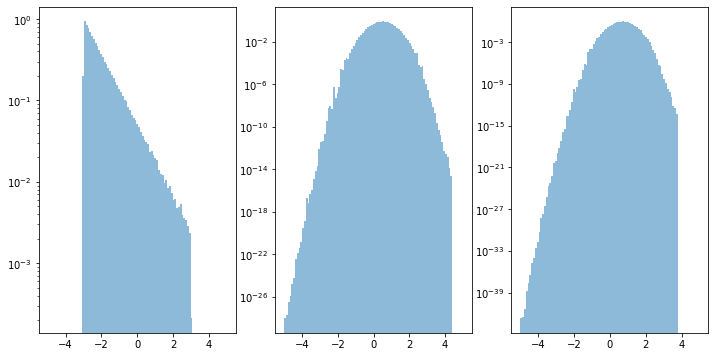

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(12,6))

bins = np.linspace(-5,5,100)

ax[0].hist(sampler.result.samples.a, weights=sampler.result.weight, bins=bins, density=True, alpha=0.5);
ax[1].hist(sampler.result.samples.b[0], weights=sampler.result.weight, bins=bins, density=True, alpha=0.5);
ax[2].hist(sampler.result.samples.b[1], weights=sampler.result.weight, bins=bins, density=True, alpha=0.5);

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')